In [ ]:
import scipy
import numpy as np
import sklearn
from sklearn.neighbors import NearestCentroid
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [ ]:
X_train = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y_train = np.array([0, 0, 0, 1, 1, 1])
X_test = np.array([[-1, -2], [0, -1], [-3, -3], [2, 2],  [1, 2]])
y_test = np.array([0, 0, 0, 1, 1])

In [ ]:
class NearestCentroidScratch():
  def __init__(self, metric='eucledian'):                     #Contrutor
    self.metric = metric
    self.centroids_ = np.array([])
    self.target_ = np.array([])

  def fit(self, X, y):
    self.target_ = np.unique(y)                               #array com as labels
    self.centroids_ = np.empty((0, X[1].size))                #array que receberá o centróide de cada label
    self.centroids_ = np.vstack([np.mean(X[y == n], axis = 0) for n in self.target_]) 
    #calcula o centróide para cada label e empilha no array                              
  
  def predict(self, X): 
    self.predict_ = np.array([], dtype=int)   
    for x in X:                                               #percorrendo tupla a tupla a matriz de samples
      dist = []                                               #lista pra armazenar as distâncias euclideanas/hipotenusas
      [dist.append(distance.euclidean(x, self.centroids_[j,:])) for j in range(len(self.target_))] 
      #print(dist) #calcula a distância euclidiana, entre os valores da tupla(p) com o centróide(q), que varia de acordo com a qtd de labels        
      self.predict_ = np.hstack((self.predict_, self.target_[dist.index(np.min(dist))])) 
      #print(self.predict_) #empilha a label, do índice onde foi encontrada a distância mínima, da tupla atual da matriz 
    return self.predict_ 

In [ ]:
clf = NearestCentroidScratch()
clf.fit(X_train, y_train)
clf.centroids_

array([[-2.        , -1.33333333],
       [ 2.        ,  1.33333333]])

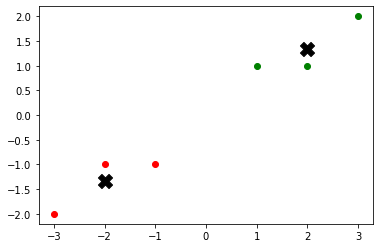

In [ ]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='r')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='g')
plt.scatter(clf.centroids_[:,0], clf.centroids_[:,1], s=200, marker='X', c='k')

In [ ]:
y_pred = clf.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 1 1]
[0 0 0 1 1]


In [ ]:
accuracy_score(y_test, y_pred) * 100

100.0